In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import mnist

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test,  10)


In [5]:
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(10,  activation='softmax')
])

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
weight_decay = 1e-4  

model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_regularizer=l2(weight_decay)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(weight_decay)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
    Dense(10,  activation='softmax')
])

In [9]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [10]:
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',
                                 factor=0.3, patience=2,
                                 min_lr=1e-5, verbose=1)

early_stop   = EarlyStopping(monitor='val_accuracy',
                             patience=5, restore_best_weights=True, verbose=1)

In [11]:
hist1 = model1.fit(x_train, y_train,
                   epochs=10, batch_size=64,
                   validation_split=0.1, verbose=2)

Epoch 1/10
844/844 - 7s - 8ms/step - accuracy: 0.9147 - loss: 0.2943 - val_accuracy: 0.9635 - val_loss: 0.1273
Epoch 2/10
844/844 - 4s - 5ms/step - accuracy: 0.9627 - loss: 0.1247 - val_accuracy: 0.9708 - val_loss: 0.0978
Epoch 3/10
844/844 - 4s - 5ms/step - accuracy: 0.9751 - loss: 0.0843 - val_accuracy: 0.9723 - val_loss: 0.0959
Epoch 4/10
844/844 - 4s - 5ms/step - accuracy: 0.9816 - loss: 0.0614 - val_accuracy: 0.9715 - val_loss: 0.1055
Epoch 5/10
844/844 - 4s - 5ms/step - accuracy: 0.9869 - loss: 0.0454 - val_accuracy: 0.9717 - val_loss: 0.1081
Epoch 6/10
844/844 - 4s - 5ms/step - accuracy: 0.9904 - loss: 0.0343 - val_accuracy: 0.9728 - val_loss: 0.1072
Epoch 7/10
844/844 - 4s - 5ms/step - accuracy: 0.9918 - loss: 0.0277 - val_accuracy: 0.9742 - val_loss: 0.1139
Epoch 8/10
844/844 - 4s - 5ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9743 - val_loss: 0.1087
Epoch 9/10
844/844 - 4s - 5ms/step - accuracy: 0.9936 - loss: 0.0194 - val_accuracy: 0.9733 - val_loss: 0.1115
E

In [12]:
hist3 = model3.fit(x_train, y_train,
                   epochs=30, batch_size=128,
                   validation_split=0.1, verbose=2,
                   callbacks=[lr_scheduler, early_stop])


Epoch 1/30
422/422 - 14s - 34ms/step - accuracy: 0.9007 - loss: 0.4198 - val_accuracy: 0.9638 - val_loss: 0.2026 - learning_rate: 1.0000e-03
Epoch 2/30
422/422 - 8s - 18ms/step - accuracy: 0.9573 - loss: 0.2328 - val_accuracy: 0.9723 - val_loss: 0.1781 - learning_rate: 1.0000e-03
Epoch 3/30
422/422 - 9s - 20ms/step - accuracy: 0.9671 - loss: 0.1980 - val_accuracy: 0.9792 - val_loss: 0.1635 - learning_rate: 1.0000e-03
Epoch 4/30
422/422 - 8s - 19ms/step - accuracy: 0.9716 - loss: 0.1807 - val_accuracy: 0.9770 - val_loss: 0.1606 - learning_rate: 1.0000e-03
Epoch 5/30
422/422 - 8s - 19ms/step - accuracy: 0.9751 - loss: 0.1679 - val_accuracy: 0.9803 - val_loss: 0.1572 - learning_rate: 1.0000e-03
Epoch 6/30
422/422 - 8s - 18ms/step - accuracy: 0.9780 - loss: 0.1583 - val_accuracy: 0.9808 - val_loss: 0.1525 - learning_rate: 1.0000e-03
Epoch 7/30
422/422 - 7s - 17ms/step - accuracy: 0.9786 - loss: 0.1515 - val_accuracy: 0.9777 - val_loss: 0.1593 - learning_rate: 1.0000e-03
Epoch 8/30
422/422 

In [13]:
print("\nTest‑set performance")
for name, model in [("Baseline", model1), ("Regularised + LR sched", model3)]:
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name:26s}  |  loss: {loss:6.4f}   acc: {acc*100:5.2f}%")


Test‑set performance
Baseline                    |  loss: 0.0966   acc: 97.42%
Regularised + LR sched      |  loss: 0.1078   acc: 98.60%


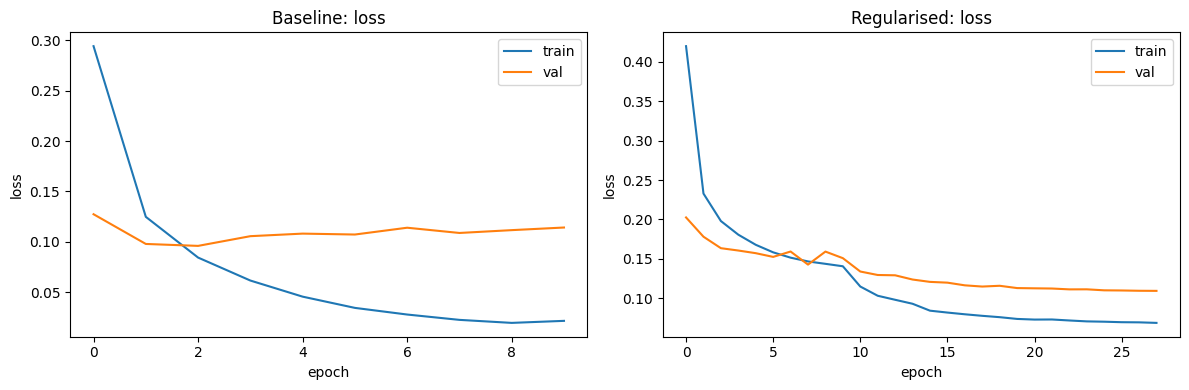

In [14]:
def plot_history(h, title):
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='val')
    plt.title(title); plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plot_history(hist1, 'Baseline: loss')
plt.subplot(1,2,2); plot_history(hist3, 'Regularised: loss')
plt.tight_layout(); plt.show()

## **Model 1**:
_**Regularization**_: Uses only L2 regularization.

_**Training Loss**_: Very low by epoch 10 (0.0214), indicating strong fit to the training data.

_**Validation Loss**_: Initially improves but starts to increase after a few epochs, ending at 0.1141, which is a sign of overfitting.

_**Accuracy**_:

Final training accuracy: 99.27%

Final validation accuracy: 97.60%

Test accuracy: Around 97.93%

## **Model 2**:
_**Regularization Techniques**_: Uses a combination of:

1. Dropout

1. L1/L2 Regularization

1. Batch Normalization

1. Learning Rate Scheduler

_**Training Loss**_: Higher than Model 1 (e.g., 0.1467 at epoch 8), due to stronger regularization.

_**Validation Loss**_: More stable and lower overall compared to Model 1, ending around 0.1427 by epoch 8.

_**Accuracy**_:

Final training accuracy: 98.13%

Final validation accuracy: 98.27%

Test accuracy: Around 98.20%